In [1]:
### Init ###
from helpers.async_logger import AsyncLogger
logger = AsyncLogger.get_instance('image_recognition')

In [2]:
### Import Training Data ###
from pandas import DataFrame
from pathlib import Path
from random import shuffle
from keras.preprocessing.image import load_img, img_to_array

images = []
IMG_SQUARE_SIZE = 100
folder_tuples = (('./data/watpo', 0), ('./data/watprakeaw', 1))

for folder, label in folder_tuples:
    pngs = Path(folder).glob('*.png')
    for png in pngs:
        file_path = png
        file_name = str(png).split('/')[-1]
        img_arr = img_to_array(load_img(png, target_size=(IMG_SQUARE_SIZE, IMG_SQUARE_SIZE), grayscale=True))
        images.append({ 'file_name': file_name, 'file_path': file_path, 'img_arr': img_arr, 'label': label })
        del file_path, file_name, img_arr

shuffle(images)
img_df = DataFrame(images)
del folder_tuples, folder, label, png, pngs, images
await logger.info(f'\n{img_df}')

Using TensorFlow backend.
[INFO] 
          file_name                       file_path  \
0    prakeaw284.png  data/watprakeaw/prakeaw284.png   
1          po63.png             data/watpo/po63.png   
2         po339.png            data/watpo/po339.png   
3         po222.png            data/watpo/po222.png   
4    prakeaw263.png  data/watprakeaw/prakeaw263.png   
..              ...                             ...   
983        po30.png             data/watpo/po30.png   
984       po242.png            data/watpo/po242.png   
985  prakeaw407.png  data/watprakeaw/prakeaw407.png   
986  prakeaw410.png  data/watprakeaw/prakeaw410.png   
987       po483.png            data/watpo/po483.png   

                                               img_arr  label  
0    [[[104.0], [104.0], [104.0], [104.0], [104.0],...      1  
1    [[[255.0], [255.0], [255.0], [255.0], [255.0],...      0  
2    [[[146.0], [147.0], [149.0], [149.0], [150.0],...      0  
3    [[[104.0], [59.0], [50.0], [42.0], [26.0], [

In [3]:
### Define drawImg method to show image imported using MatplotLib ###
from matplotlib import pyplot
from keras.preprocessing.image import array_to_img
def drawImg(img_arr, label=None):
    pyplot.title('Wat Po' if label == 0 else 'Wat Prakeaw')
    pyplot.imshow(array_to_img(img_arr), cmap='gray')
    pyplot.show()

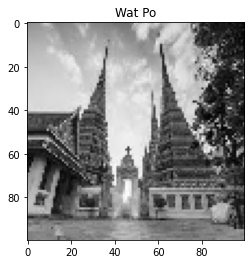

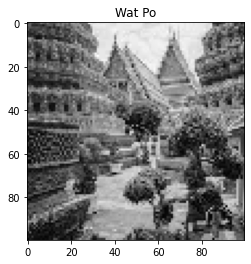

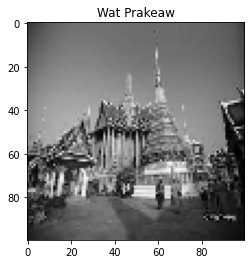

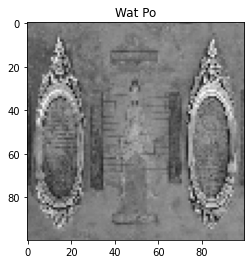

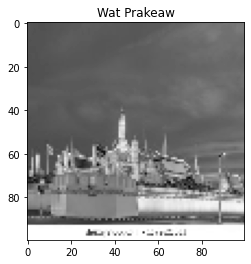

In [4]:
### Shows a few random images from Data Sets ###
from random import randint
for _ in range(5):
    img_idx = randint(0, len(img_df)-1)
    img = img_df.iloc[img_idx]
    drawImg(img.img_arr, img.label)
del img_idx

In [5]:
### Ready the Data Set Features and Labels
from numpy import array
features = []
labels = []
for i in range(0, len(img_df)-1):
    img = img_df.iloc[i]
    features.append(img.img_arr)
    labels.append(img.label)
features = array(features).reshape(-1, IMG_SQUARE_SIZE, IMG_SQUARE_SIZE, 1)
features = features/255.0
labels = array(labels)

In [6]:
### Define and Train Model ### 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

input_shape = features.shape[1:]
# Create a Sequential Neural Network Model 
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 1
model.add(Conv2D(64, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 2
model.add(Conv2D(128, (3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 3
model.add(Conv2D(128, (3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 4
model.add(Flatten())
model.add(Dropout(0.5)) # Prevent Overfitting with Dropout Regularization
model.add(Dense(512))
model.add(Activation('relu'))
# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))
model_summary = model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)      

In [7]:
### Compile and Fit Model to Training Data Collected ###
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(features, labels, batch_size=32, epochs=30)

Epoch 1/30
987/987 [==============================] - 10s 10ms/step - loss: 0.6947 - accuracy: 0.5177
Epoch 2/30
987/987 [==============================] - 9s 9ms/step - loss: 0.6818 - accuracy: 0.5694
Epoch 3/30
987/987 [==============================] - 9s 10ms/step - loss: 0.6601 - accuracy: 0.6018
Epoch 4/30
987/987 [==============================] - 9s 9ms/step - loss: 0.6188 - accuracy: 0.6464
Epoch 5/30
987/987 [==============================] - 9s 9ms/step - loss: 0.5689 - accuracy: 0.6819
Epoch 6/30
987/987 [==============================] - 9s 9ms/step - loss: 0.5535 - accuracy: 0.6940
Epoch 7/30
987/987 [==============================] - 9s 9ms/step - loss: 0.4923 - accuracy: 0.7599
Epoch 8/30
987/987 [==============================] - 9s 9ms/step - loss: 0.4667 - accuracy: 0.7619
Epoch 9/30
987/987 [==============================] - 9s 9ms/step - loss: 0.4102 - accuracy: 0.8095
Epoch 10/30
987/987 [==============================] - 10s 10ms/step - loss: 0.3770 - accuracy: 0

In [8]:
### Save the Model ###
from helpers.pickler import Pickler
pickler = Pickler.get_instance()
await pickler.save(model, 'convulution_model')
del pickler

In [9]:
### Try out our Binary Image Classification Model ###
from os.path import exists
from keras.preprocessing.image import load_img, img_to_array

folder_tuple = ( './data/watpo', './data/watprakeaw' )
name_tuple = ( '/po{n}.png', '/prakeaw{n}.png' )
test_data = []
test_images = []

for _ in range(10):
    label = randint(0, 1) # Pull out Wat Po or Wat Prakeaw Image
    folder = folder_tuple[label]
    png_count = len(list(Path(folder).glob('*.png')))
    random_n = randint(1, png_count)
    while True:
        file_name = name_tuple[label].format(n=random_n)
        file_path = f'{folder}{file_name}'
        if exists(file_path): break
    img_draw=load_img(file_path, target_size=(IMG_SQUARE_SIZE, IMG_SQUARE_SIZE))
    test_images.append(img_to_array(load_img(file_path, target_size=(IMG_SQUARE_SIZE, IMG_SQUARE_SIZE), grayscale=True)))
    test_data.append(dict(actual_label=label, file_path=file_path, img_draw=img_draw))
del folder_tuple, name_tuple, label, folder, png_count, random_n, file_name, file_path, img_draw
predicted_labels = model.predict(array(test_images).reshape(-1, IMG_SQUARE_SIZE, IMG_SQUARE_SIZE, 1)/255.0)

In [10]:
### Define drawImgWithPrediction to show title of image selected ###
### for prediction with a textbox of the prediction made by model ###
def drawImgWithPrediction(img_draw, actual_label, predicted_label):
    title = 'Wat Po' if actual_label == 0 else 'Wat Prakeaw'
    pyplot.title(title)
    pyplot.imshow(img_draw)
    correct = actual_label == predicted_label
    text_ec = (0.5, 1, 0.5) if correct else (1., 0.5, 0.5)
    text_fc = (0.8, 1, 0.8) if correct else (1., 0.8, 0.8)
    predict_text = 'Prediction: '
    predict_text += 'Wat Po' if predicted_label == 0 else 'Wat Prakeaw'
    pyplot.text(0.5, 0.5, predict_text, ha='left', va='top',bbox=dict(boxstyle='round',ec=text_ec,fc=text_fc))
    pyplot.show()

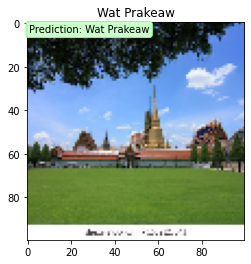

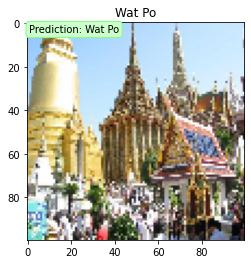

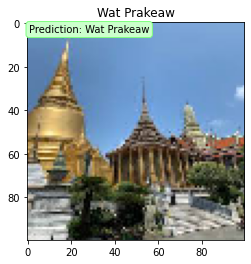

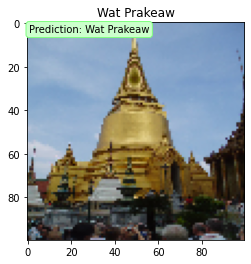

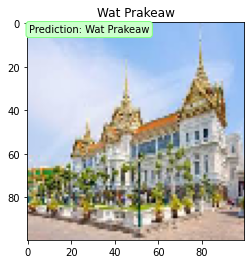

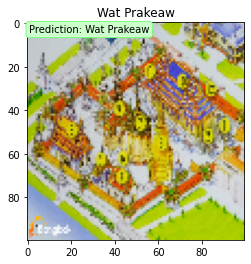

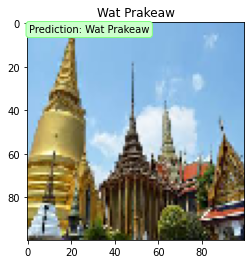

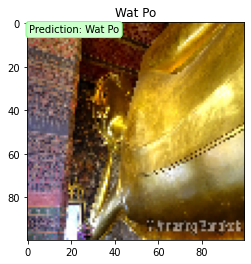

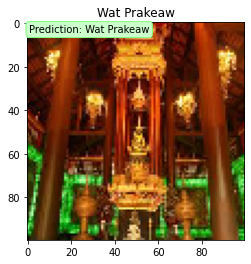

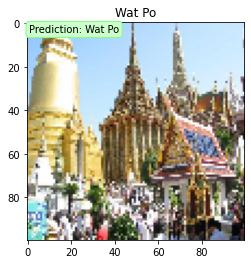

In [11]:
### Output Predictions in Comparison with Actual Label: Wat Po or Wat Prakeaw ###
for _, test_item in enumerate(test_data):
    predicted_label = 0 if predicted_labels[_] < 0.5 else 1
    drawImgWithPrediction(test_item['img_draw'], test_item['actual_label'], predicted_label)

In [12]:
### Test Against Data Outside of Training Data ###
test_folder_tuple = ( './data/watpo/test', './data/watprakeaw/test' )
name_tuple = ( '/po{n}.png', '/prakeaw{n}.png' )
test_data = []
test_images = []
for _ in range(1, 5):
    for label in range(0, 2):
        folder = test_folder_tuple[label]
        png_count = len(list(Path(folder).glob('*.png')))
        while True:
            file_name = name_tuple[label].format(n=_)
            file_path = f'{folder}{file_name}'
            if exists(file_path): break
        img_draw=load_img(file_path, target_size=(IMG_SQUARE_SIZE, IMG_SQUARE_SIZE))
        test_images.append(img_to_array(load_img(file_path, target_size=(IMG_SQUARE_SIZE, IMG_SQUARE_SIZE), grayscale=True)))
        test_data.append(dict(actual_label=label, file_path=file_path, img_draw=img_draw))
del test_folder_tuple, name_tuple, label, folder, png_count, file_name, file_path, img_draw
predicted_labels = model.predict(array(test_images).reshape(-1, IMG_SQUARE_SIZE, IMG_SQUARE_SIZE, 1)/255.0)

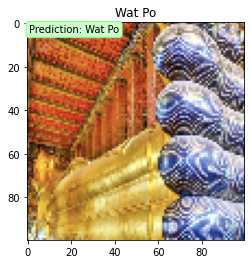

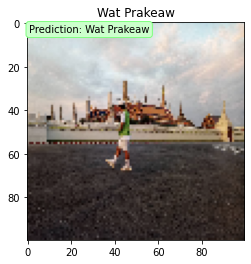

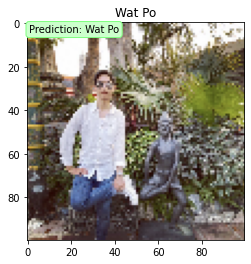

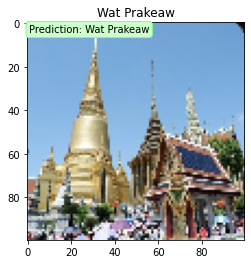

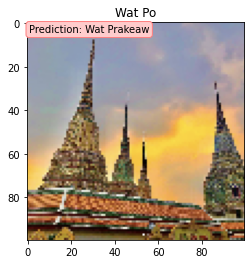

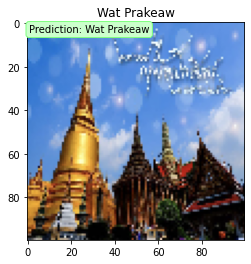

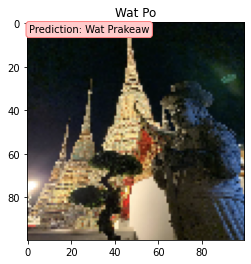

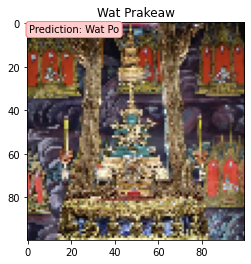

In [14]:
### Output Predictions in Comparison with Actual Label: Wat Po or Wat Prakeaw ###
actual_labels = []
for _, test_item in enumerate(test_data):
    predicted_label = 0 if predicted_labels[_] < 0.5 else 1
    actual_labels.append(test_item['actual_label'])
    drawImgWithPrediction(test_item['img_draw'], test_item['actual_label'], predicted_label)

In [18]:
### Present Prediction Metrics ###
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(actual_labels, predicted_labels)
mse = mean_squared_error(actual_labels, predicted_labels)
rmse = sqrt(mse)
await logger.infoWarn('Floating Point Errors:')
await logger.info(f'R2: {r2:.4f}')
await logger.info(f'Mean Squared Error: {mse:.4f}')
await logger.info(f'Root Mean Squared Error: {rmse:.4f}')

predicted_binary_labels = list(map(lambda x: 0 if x <0.5 else 1, predicted_labels))
r2 = r2_score(actual_labels, predicted_binary_labels)
mse = mean_squared_error(actual_labels, predicted_binary_labels)
rmse = sqrt(mse)
await logger.infoWarn('Binary Classification Errors:')
await logger.info(f'R2: {r2:.4f}')
await logger.info(f'Mean Squared Error: {mse:.4f}')
await logger.info(f'Root Mean Squared Error: {rmse:.4f}')

[INFO] Floating Point Errors:
[INFO] R2: -0.4521
[INFO] Mean Squared Error: 0.3630
[INFO] Root Mean Squared Error: 0.6025
[INFO] Binary Classification Errors:
[INFO] R2: -0.5000
[INFO] Mean Squared Error: 0.3750
[INFO] Root Mean Squared Error: 0.6124
